In [1]:
# philip walsh
# philipwalsh.ds@gmail.com
# 2020-02-08
# Team Kermit Image Classification

# train - 2 classes - 4070 images
# ./images/train/kermit
# ./images/train/unidentified

# test - 2 classes - 50 images
# ./images/test/kermit
# ./images/test/unidentified


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
#import winsound
from datetime import datetime
import os
import random

In [4]:
import tensorflow as tf
print ('tensorflow version  :', tf.__version__)

tensorflow version  : 2.0.0


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [6]:
# callbacks
# normally i like early stopping as well as best model
# but for this model i am only using checkpoint to save my best model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
# a saved model is not provided, too large
from tensorflow.keras.models import load_model

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
data_dir_full = 'images/'
os.listdir(data_dir_full)

['readme', 'test', 'train']

In [10]:
data_dir_train = 'images/train/'
os.listdir(data_dir_train)

['kermit', 'unidentified']

In [11]:
data_dir_test = 'images/test/'
os.listdir(data_dir_test)

['kermit', 'unidentified']

In [12]:
class_0=os.listdir(data_dir_test)[0]
class_0

'kermit'

In [13]:
class_1=os.listdir(data_dir_test)[1]
class_1

'unidentified'

In [14]:
os.listdir(data_dir_train + class_1)[0:5]  # have a peek at first 5 kermit files

['001.JPG', '001_0.JPG', '001_1.JPG', '001_2.JPG', '001_3.JPG']

In [15]:
os.listdir(data_dir_train + class_0)[0:5]  # have a peek at first 5 kermit files

['_00000000001.JPG',
 '_00000000001_0.JPG',
 '_00000000001_1.JPG',
 '_00000000001_2.JPG',
 '_00000000001_3.JPG']

class_0_len   : 2035
class_0_index : 340
images/train/kermit/_00000000036_9.JPG


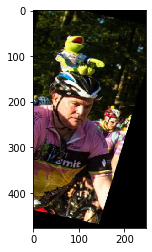

In [16]:
#lets have a look at a random picture from class 0
class_0_len=len(os.listdir(data_dir_train + class_0))
print('class_0_len   :', class_0_len)
class_0_index=random.randint(0, class_0_len-1)
print('class_0_index :', class_0_index)
class_0_random_file = data_dir_train + class_0 + '/' + os.listdir(data_dir_train + class_0)[class_0_index]
print(class_0_random_file)
#imread(class_0_random_file)
plt.imshow(imread(class_0_random_file))

class_1_len   : 2035
class_1_index : 340
images/train/unidentified/_046_6.JPG


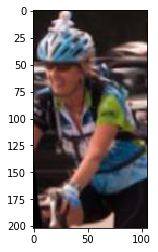

In [17]:
#lets have a look at a random picture from class 0
class_1_len=len(os.listdir(data_dir_train + class_1))
print('class_1_len   :', class_1_len)
class_1_index=random.randint(0, class_1_len-1)
print('class_1_index :', class_0_index)
class_1_random_file = data_dir_train + class_1 + '/' + os.listdir(data_dir_train + class_1)[class_1_index]
print(class_1_random_file)
#imread(class_0_random_file)
plt.imshow(imread(class_1_random_file));

In [18]:
# 
print('data_dir_train :', data_dir_train)
print('data_dir_test  :', data_dir_test)

data_dir_train : images/train/
data_dir_test  : images/test/


In [19]:
# lets loop through all the images and examie dimensions
dim1 = []
dim2 = []
color = []

check_dimensions = True  # you wont neeed to run this more than once
if check_dimensions:
    for image_filename in os.listdir(data_dir_train  + class_0 + '/'):
        img=imread(data_dir_train + class_0 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_train  + class_1 + '/'):
        img=imread(data_dir_train + class_1 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_test  + class_0 + '/'):
        img=imread(data_dir_test + class_0 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_test  + class_1 + '/'):
        img=imread(data_dir_test + class_1 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
 

In [20]:
if check_dimensions:
    print('min color :', np.min(color))
    print('max color :', np.max(color))
    print('min dim1  :', np.min(dim1))
    print('max dim1  :', np.max(dim1))
    print('min dim2  :', np.min(dim2))
    print('max dim2  :', np.max(dim2))
    print('mean dim1 :', np.mean(dim1))
    print('mean dim2 :', np.mean(dim2))

min color : 3
max color : 3
min dim1  : 92
max dim1  : 851
min dim2  : 54
max dim2  : 616
mean dim1 : 442.61432038834954
mean dim2 : 249.35364077669902


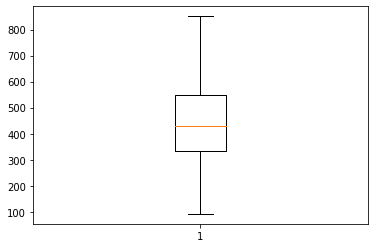

In [21]:
if check_dimensions:
    plt.boxplot(dim1);

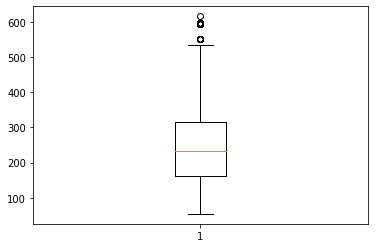

In [22]:
if check_dimensions:
    plt.boxplot(dim2);

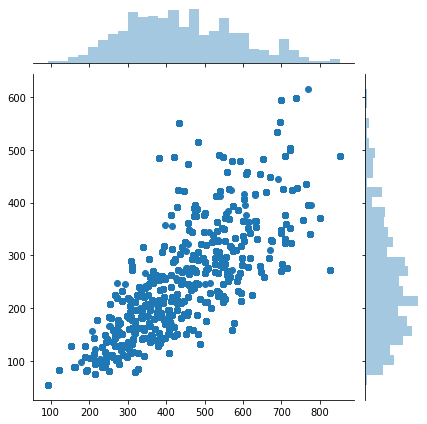

In [23]:
if check_dimensions:
    sns.jointplot(dim1,dim2);

In [24]:
# tf will need a consistent dimension, 
# so lets use numbers close to the mean and color channels 3
image_shape = (440,250,3)

In [25]:
# how many train/test files do we have?
print('X_train files  :', len(os.listdir(data_dir_train + class_0)))
print('y_train files  :', len(os.listdir(data_dir_train + class_1)))
print('X_test files   :', len(os.listdir(data_dir_test + class_0)))
print('y_test files   :', len(os.listdir(data_dir_test + class_1)))


X_train files  : 2035
y_train files  : 2035
X_test files   : 25
y_test files   : 25


In [26]:
# are our images scaled
print('class_0 min intensity : ' , imread(class_0_random_file).min())
print('class_0 max intensity : ' , imread(class_0_random_file).max())
print('class_1 min intensity : ' , imread(class_1_random_file).min())
print('class_1 max intensity : ' , imread(class_1_random_file).max())
# nope

class_0 min intensity :  0
class_0 max intensity :  255
class_1 min intensity :  0
class_1 max intensity :  255


In [27]:
# images are not scaled, we will need to do that
try:
    del image_gen
except:
    print('img gen not defined yet, saul goodman!')
    
# if scaling was needed
#   rescale=1/255 would be the proper parameter
image_gen= ImageDataGenerator(rescale=1/255,
                              rotation_range=20,
                              width_shift_range=0.10,
                              height_shift_range=0.10,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')  #fill modes constant, nearest*, reflect, wrap

img gen not defined yet, saul goodman!


performing a random trnsform on an image using tensorflow/keras
before


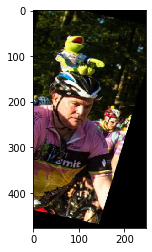

after


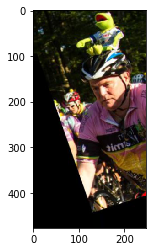

In [28]:
print('performing a random trnsform on an image using tensorflow/keras')
print('before')
plt.imshow(imread(class_0_random_file))
plt.show()
print('after')
plt.imshow(image_gen.random_transform(imread(class_0_random_file)))

In [29]:
# we will be using flow_from_directory to train our model
image_gen.flow_from_directory(data_dir_train)

Found 4070 images belonging to 2 classes.


In [30]:
image_gen.flow_from_directory(data_dir_test)

Found 50 images belonging to 2 classes.


In [31]:
try:
    del model
except:
    print('no model defined yet, saul goodman')
    
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

no model defined yet, saul goodman


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 438, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 219, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 217, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 61, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 421632)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               53969024  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [33]:
# not using early stopping for this model
#try:
#    del e_stop
#except:
#    print('e_stop is not defined yet, saul goodman')
      
#e_stop = EarlyStopping(monitor='val_loss', patience=2)
#print('e_stop defined')

try:
    del best_mod
except:
    print('best_mod is not defined yet, saul goodman')
    
    
# ** dont forget to create the folder ./model/ **

# i want to save my very best model
best_mod = ModelCheckpoint('model/find_kermit.h5', 
                     monitor='val_loss', 
                     save_best_only=True)
print('best_mod defined')

best_mod is not defined yet, saul goodman
best_mod defined


In [34]:
batch_size=16

In [35]:
try:
    del train_image_gen
except:
    pass

train_image_gen = image_gen.flow_from_directory(data_dir_train,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 4070 images belonging to 2 classes.


In [36]:
try:
    del test_image_gen
except:
    pass

test_image_gen = image_gen.flow_from_directory(data_dir_test, 
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 50 images belonging to 2 classes.


In [37]:
# sanity check here, make sure my classes in trin/tets folder are the same
train_image_gen.class_indices

{'kermit': 0, 'unidentified': 1}

In [38]:
test_image_gen.class_indices

{'kermit': 0, 'unidentified': 1}

In [40]:
my_epochs = 25
# my main machine has 2 GPU(s)
# so here i select which device i want to train the model on
if True:
    with tf.device('/CPU:0'):
        # i7-6700K @ 4.00GHz or i7-7820HQ @ 2.90 GHz
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod]) 
if False:
    with tf.device('/GPU:0'): 
        # RTX 2080
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod])
if False:
    with tf.device('/GPU:1'): 
        # GTX 970
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod])
    



Epoch 1/25
255/255 [==============================] - 456s 2s/step - loss: 0.4990 - accuracy: 0.8012 - val_loss: 0.5507 - val_accuracy: 0.7400
Epoch 2/25
255/255 [==============================] - 465s 2s/step - loss: 0.4250 - accuracy: 0.8479 - val_loss: 0.1310 - val_accuracy: 0.9600
Epoch 3/25
255/255 [==============================] - 472s 2s/step - loss: 0.3820 - accuracy: 0.8587 - val_loss: 0.2273 - val_accuracy: 0.9000
Epoch 4/25
255/255 [==============================] - 489s 2s/step - loss: 0.3795 - accuracy: 0.8629 - val_loss: 0.8712 - val_accuracy: 0.7600
Epoch 5/25
255/255 [==============================] - 481s 2s/step - loss: 0.3658 - accuracy: 0.8607 - val_loss: 0.3240 - val_accuracy: 0.9200
Epoch 6/25
255/255 [==============================] - 430s 2s/step - loss: 0.3561 - accuracy: 0.8708 - val_loss: 0.4137 - val_accuracy: 0.9000
Epoch 7/25
255/255 [==============================] - 422s 2s/step - loss: 0.3390 - accuracy: 0.8683 - val_loss: 0.4128 - val_accuracy: 0.9000

In [41]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.499013,0.801229,0.550665,0.74
1,0.425089,0.847912,0.131044,0.96
2,0.382605,0.858722,0.227267,0.90
3,0.379909,0.862899,0.871244,0.76
4,0.365951,0.860688,0.324046,0.92
5,0.355677,0.870762,0.413696,0.90
6,0.339398,0.868305,0.412823,0.90
7,0.318568,0.884030,0.638415,0.84
8,0.316621,0.891401,0.295388,0.90
9,0.305273,0.889681,0.227020,0.90


In [42]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

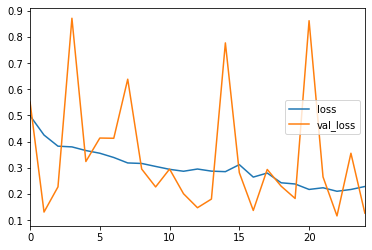

In [43]:
metrics[['loss','val_loss']].plot();

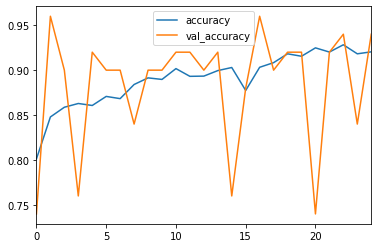

In [44]:
metrics[['accuracy','val_accuracy']].plot();

In [45]:
best_model = load_model('model/find_kermit.h5')

In [46]:
best_model.evaluate_generator(test_image_gen)

[0.08338540606200695, 0.96]

In [47]:
pred=best_model.predict_generator(test_image_gen)

In [48]:
np.round(pred,2)

array([[0.03],
       [0.1 ],
       [0.  ],
       [0.06],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.02],
       [0.01],
       [0.01],
       [0.13],
       [0.02],
       [0.  ],
       [0.12],
       [0.07],
       [0.31],
       [0.  ],
       [0.01],
       [0.32],
       [0.02],
       [0.  ],
       [0.14],
       [0.01],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.07],
       [1.  ],
       [0.99],
       [1.  ],
       [1.  ],
       [0.95],
       [0.29],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.89],
       [0.5 ],
       [0.43],
       [0.98],
       [0.45],
       [0.89],
       [0.99],
       [0.19],
       [1.  ],
       [1.  ],
       [0.98],
       [0.98],
       [1.  ],
       [1.  ]], dtype=float32)

In [49]:
predictions = (pred > 0.5)
try:
    del preds_df
except:
    print('not defined yet, saul goodman')

preds_df = pd.DataFrame(predictions)
preds_df = pd.concat([preds_df, pd.Series(test_image_gen.classes)], axis=1)
preds_df.columns=['prediction', 'truth']
preds_df.prediction = preds_df.prediction.astype(int)


not defined yet, saul goodman


In [50]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.80      0.89        25

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.90        50
weighted avg       0.92      0.90      0.90        50



In [51]:
predictions = (pred > 0.5) 
# test_image_gen.classes is the truth, compare that against the predictions
print(confusion_matrix(test_image_gen.classes, predictions))
# 0=kermit
# 1=unidentified
# true positive=25
# false positive=0
# false negtive=4
# true negative = 21

[[25  0]
 [ 5 20]]


In [52]:
# have a look at the mis classified images
false_positive = preds_df[(preds_df['prediction'] != preds_df['truth']) & (preds_df['prediction']==1) ]

print('incorrectly classified as not kermit')
for index, row in false_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_0 + '/' + os.listdir(data_dir_test + class_0 + '/')[index]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

incorrectly classified as not kermit


incorrectly classified as kermit
26 0 1


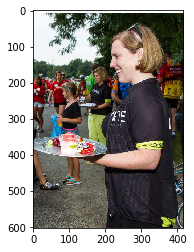

32 0 1


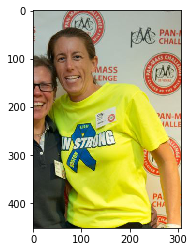

38 0 1


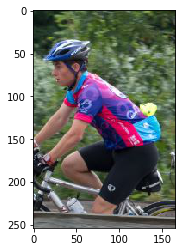

40 0 1


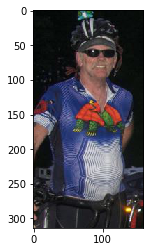

43 0 1


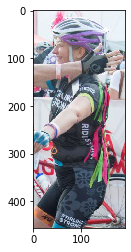

In [53]:
# have a look at the mis classified images
false_negative = preds_df[(preds_df['prediction'] != preds_df['truth']) & (preds_df['prediction']==0) ]

print('incorrectly classified as kermit')
for index, row in false_negative.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_1 + '/' + os.listdir(data_dir_test + class_1 + '/')[index-25]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

In [54]:
# lets raise the bar, lets say we want to be more sure that the image is not kermit
predictions = (pred > 0.95) 
try:
    del preds_df
except:
    print('not defined yet, saul goodman')

preds_df = pd.DataFrame(predictions)
preds_df = pd.concat([preds_df, pd.Series(test_image_gen.classes)], axis=1)
preds_df.columns=['prediction', 'truth']
preds_df.prediction = preds_df.prediction.astype(int)


In [56]:
#print(test_image_gen.classes)
# test_image_gen.classes is the truth, compare that against the predictions
print(confusion_matrix(test_image_gen.classes, predictions))
# we get FP++, 

[[25  0]
 [ 9 16]]


In [57]:
# have a look at the mis classified images
false_positive = preds_df[(preds_df['prediction'] != preds_df['truth']) & (preds_df['prediction']==1) ]

print('incorrectly classified as not kermit')
for index, row in false_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_0 + '/' + os.listdir(data_dir_test + class_0 + '/')[index]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

incorrectly classified as not kermit


incorrectly classified as kermit
26 0 1


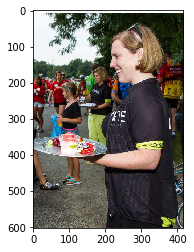

31 0 1


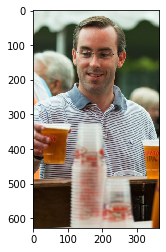

32 0 1


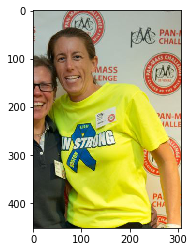

36 0 1


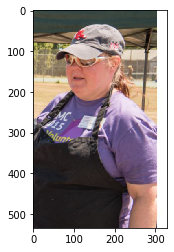

37 0 1


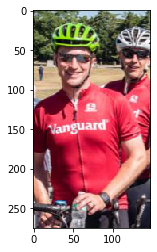

38 0 1


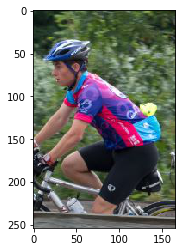

40 0 1


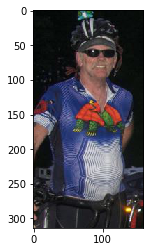

41 0 1


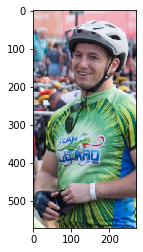

43 0 1


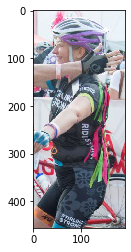

In [58]:
# have a look at the mis classified images
false_negative = preds_df[(preds_df['prediction'] != preds_df['truth']) & (preds_df['prediction']==0) ]

print('incorrectly classified as kermit')
for index, row in false_negative.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_1 + '/' + os.listdir(data_dir_test + class_1 + '/')[index-25]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

In [59]:
# lets lower the bar, lets say we want cast a wider net on the unidentified
predictions = (pred > 0.05) 
try:
    del preds_df
except:
    print('not defined yet, saul goodman')

preds_df = pd.DataFrame(predictions)
preds_df = pd.concat([preds_df, pd.Series(test_image_gen.classes)], axis=1)
preds_df.columns=['prediction', 'truth']
preds_df.prediction = preds_df.prediction.astype(int)

In [65]:
predictions = (pred > 0.05)
# test_image_gen.classes is the truth, compare that against the predictions
print(confusion_matrix(test_image_gen.classes, predictions))
#TP 20    FP 5
#FN 1     TN 24

[[17  8]
 [ 0 25]]


incorrectly classified as not kermit
1 1 0


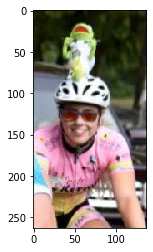

3 1 0


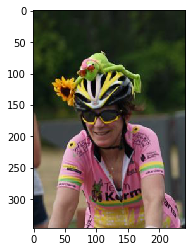

10 1 0


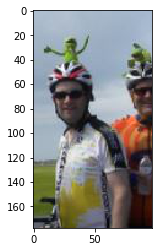

13 1 0


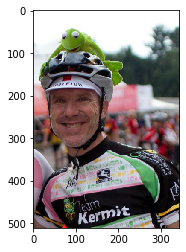

14 1 0


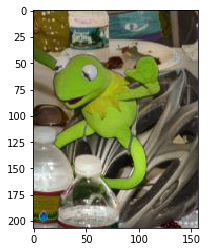

15 1 0


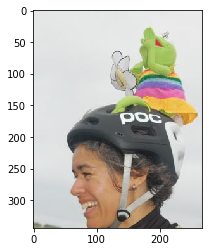

18 1 0


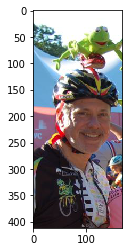

21 1 0


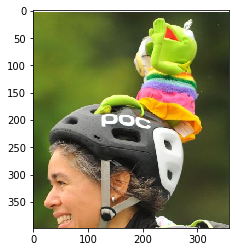

In [66]:
# have a look at the mis classified images
false_positive = preds_df[(preds_df['prediction'] != preds_df['truth']) & (preds_df['prediction']==1) ]


print('incorrectly classified as not kermit')
for index, row in false_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_0 + '/' + os.listdir(data_dir_test + class_0 + '/')[index]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

In [67]:
# have a look at the mis classified images
false_negative = preds_df[(preds_df['prediction'] != preds_df['truth']) & (preds_df['prediction']==0) ]
print(false_negative)
print('incorrectly classified as kermit')
for index, row in false_negative.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_1 + '/' + os.listdir(data_dir_test + class_1 + '/')[index-25]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

Empty DataFrame
Columns: [prediction, truth]
Index: []
incorrectly classified as kermit
